# Gather

In [1]:
# Import Libraries:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import re
from timeit import default_timer as timer
import matplotlib as plt

In [2]:
os.chdir('/home/sri/my_project_dir/udacity/DataWranglingProject/files')

In [3]:
#Read in the file that has been downloaded from Udacity #Gather Data Source #1
twitter_enhanced = pd.read_csv("twitter-archive-enhanced.csv")

In [4]:
twitter_enhanced.sample(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1242  711998809858043904                    NaN                  NaN   
795   773308824254029826                    NaN                  NaN   

                      timestamp  \
1242  2016-03-21 19:31:59 +0000   
795   2016-09-06 23:56:05 +0000   

                                                 source  \
1242  <a href="http://twitter.com/download/iphone" r...   
795   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1242  RT @twitter: @dog_rates Awesome Tweet! 12/10. ...         7.119983e+17   
795   This is Bungalo. She uses that face to get wha...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1242                  783214.0  2016-03-21 19:29:52 +0000   
795                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1242  https://twitter.com/twitter/status/71199827977...                12   
795   https://twitter.com/dog_rates/status/773308824...                12   

      rating_denominator     name doggo floofer pupper puppo  
1242                  10     None  None    None   None  None  
795                   10  Bungalo  None    None   None  None

In [5]:
#Programatically download the twitter image predictions from the Udacity website # Gather Data Source #2
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
#Check the response is 200
response

<Response [200]>

In [7]:
#Save all the file.
#write the programatically downloaded file contents into a files directory
folder = 'files/'
filename = url.split('/')[-1]

if not os.path.exists(folder):
    os.makedirs(folder)
    
with open(os.path.join(folder, filename ), mode='wb') as file:
    file.write(response.content)

In [8]:
# read the unloaded file into a data frame
image_predictions = pd.read_csv(folder + filename, sep='\t')

In [9]:
image_predictions.sample(2)

tweet_id                                          jpg_url  \
178   669216679721873412  https://pbs.twimg.com/media/CUmJBS5WUAAKtrP.jpg   
1353  760190180481531904  https://pbs.twimg.com/media/Coy87yiWYAACtPf.jpg   

      img_num                p1   p1_conf  p1_dog             p2   p2_conf  \
178         1  golden_retriever  0.992758    True   Irish_setter  0.003379   
1353        1           balloon  0.917525   False  confectionery  0.049329   

      p2_dog      p3   p3_conf  p3_dog  
178     True  Saluki  0.001230    True  
1353   False  maraca  0.017648   False

In [10]:
# Use the Data from Twitter using the tweepy API
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [11]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in twitter_enhanced["tweet_id"]:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [106]:
len(fails_dict)

25

In [13]:
user_dtls = []
tweet_dtls = []
with open('tweet_json.txt','r') as json_file:    
    for record in json_file:
        url=''
        user_follower_count=0
        user_friends_count=0
        tweet_id=''
        user_id = ''
        favorite_count=0
        retweet_count=0
        retweeted=False
        
        data = json.loads(record)
        
        
        tweet_id = data['id']
        user_id = data['user']['id']
        user_follower_count = data['user']['followers_count']
        user_friends_count = data['user']['friends_count']
        
        url = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
        retweeted = data['retweeted']
        user_dtls.append({'user_id': str(user_id),
                             'user_follower_count': int(user_follower_count),
                             'user_friends_count': int(user_friends_count)
                         })

        tweet_dtls.append({'tweet_id': str(tweet_id),
                           'user_id': str(user_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'retweeted' : retweeted,
                             'url': url
                         })
        
tweet_api_data = pd.DataFrame(tweet_dtls, columns = ['tweet_id', 'user_id',  'favorite_count', 'retweet_count','retweeted','url'])
tweet_user_data = pd.DataFrame(user_dtls, columns = ['user_id', 'user_follower_count','user_friends_count'])

In [14]:
#CODE: change tweet_id from str to int
tweet_api_data['tweet_id'] = tweet_api_data['tweet_id'].astype(np.int64)

In [15]:
tweet_api_data.sample(5)

tweet_id     user_id  favorite_count  retweet_count  \
509   808838249661788160  4196983835           10421           3156   
296   835309094223372289  4196983835               0          21260   
2258  667200525029539841  4196983835             593            250   
250   842765311967449089  4196983835            6780           1287   
1651  682242692827447297  4196983835            3279           1175   

      retweeted                                                url  
509       False  https://twitter.com/dog_rates/status/808838249...  
296       False  https://twitter.com/dog_rates/status/835309094...  
2258      False  https://twitter.com/dog_rates/status/667200525...  
250       False  https://twitter.com/dog_rates/status/842765311...  
1651      False  https://twitter.com/dog_rates/status/682242692...

In [16]:
tweet_user_data.sample(5)

user_id  user_follower_count  user_friends_count
1772  4196983835              8673365                  15
2000  4196983835              8673366                  15
1734  4196983835              8673365                  15
431   4196983835              8673366                  15
1000  4196983835              8673363                  15

# Assess

In [17]:
tweet_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id          2331 non-null int64
user_id           2331 non-null object
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
retweeted         2331 non-null bool
url               2331 non-null object
dtypes: bool(1), int64(3), object(2)
memory usage: 75.2+ KB


In [18]:
#Some columns not visibile
pd.set_option('display.max_columns', 40)

In [19]:
tweet_api_data.head(5)

tweet_id     user_id  favorite_count  retweet_count  retweeted  \
0  892420643555336193  4196983835           36595           7789      False   
1  892177421306343426  4196983835           31529           5769      False   
2  891815181378084864  4196983835           23753           3818      False   
3  891689557279858688  4196983835           39915           7960      False   
4  891327558926688256  4196983835           38111           8594      False   

                                                 url  
0  https://twitter.com/dog_rates/status/892420643...  
1  https://twitter.com/dog_rates/status/892177421...  
2  https://twitter.com/dog_rates/status/891815181...  
3  https://twitter.com/dog_rates/status/891689557...  
4  https://twitter.com/dog_rates/status/891327558...

In [20]:
tweet_api_data.tail(5)

tweet_id     user_id  favorite_count  retweet_count  \
2326  666049248165822465  4196983835              99             41   
2327  666044226329800704  4196983835             274            133   
2328  666033412701032449  4196983835             114             41   
2329  666029285002620928  4196983835             121             43   
2330  666020888022790149  4196983835            2445            469   

      retweeted                                                url  
2326      False  https://twitter.com/dog_rates/status/666049248...  
2327      False  https://twitter.com/dog_rates/status/666044226...  
2328      False  https://twitter.com/dog_rates/status/666033412...  
2329      False  https://twitter.com/dog_rates/status/666029285...  
2330      False  https://twitter.com/dog_rates/status/666020888...

In [21]:
tweet_api_data.describe()

tweet_id  favorite_count  retweet_count
count  2.331000e+03     2331.000000    2331.000000
mean   7.419079e+17     7646.195624    2737.282282
std    6.823170e+16    11863.744040    4628.937506
min    6.660209e+17        0.000000       1.000000
25%    6.782670e+17     1336.500000     553.500000
50%    7.182469e+17     3328.000000    1286.000000
75%    7.986692e+17     9382.000000    3185.500000
max    8.924206e+17   158108.000000   78760.000000

In [22]:
twitter_enhanced.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [23]:
twitter_enhanced.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
931   754120377874386944                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
50    882627270321602560                    NaN                  NaN   
34    885528943205470208                    NaN                  NaN   
2039  671547767500775424                    NaN                  NaN   

                      timestamp  \
931   2016-07-16 01:08:03 +0000   
2353  2015-11-15 23:21:54 +0000   
50    2017-07-05 15:48:34 +0000   
34    2017-07-13 15:58:47 +0000   
2039  2015-12-01 04:33:59 +0000   

                                                 source  \
931   <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
50    <a href="http://twitter.com/download/iphone" r...   
34    <a href="http://twitter.com/download/iphone" r...   
2039  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
931   When you hear your owner say they need to hatc...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
50    This is Stanley. He has his first swim lesson ...                  NaN   
34    This is Maisey. She fell asleep mid-excavation...                  NaN   
2039  This is Marley. She chews shoes then feels ext...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
931                        NaN                        NaN   
2353                       NaN                        NaN   
50                         NaN                        NaN   
34                         NaN                        NaN   
2039                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
931   https://twitter.com/dog_rates/status/754120377...                10   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
50    https://twitter.com/dog_rates/status/882627270...                13   
34    https://twitter.com/dog_rates/status/885528943...                13   
2039  https://twitter.com/dog_rates/status/671547767...                10   

      rating_denominator     name doggo floofer pupper puppo  
931                   10     None  None    None   None  None  
2353                  10        a  None    None   None  None  
50                    10  Stanley  None    None   None  None  
34                    10   Maisey  None    None   None  None  
2039                  10   Marley  None    None   None  None

In [24]:
twitter_enhanced.tail(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [25]:
twitter_enhanced.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [26]:
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [27]:
image_predictions.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [28]:
image_predictions.tail(5)

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [29]:
image_predictions.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [30]:
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

### Quality Observations/Assessment

While Carrying out a Visual inspection and Programatic inspection, the following observations were noted
Visual assessment
1. Date and Time fields were not defined as datetime e.g. twitter_enhanced.retweeted_status_timestamp, twitter_enhanced.timestamp - Visual assessment from .info() above
2. twitter_enhanced has several columns for dog names - melt columns into 1 - Visual assessment .info() report
3. Combine all three datasets into 1 (They have same information and should be 1 table)
Programatic assessment
4. There is an statement made that the Denominator must all be 10 - which is not the case
5. twitter_enhanced.name column has several values which are not names e.g. None, a etc.
6. twitter_enhanced has several retweeted rows - only original tweets are to be considered
7. Some jpg_url are duplicated for different twitter ids - Drop jpg_url duplicated
8. Simplify Predictions to be based on highest prediction and True Prediction
9. inconsistencies in ratings Numerator (Decimals in text, Value in thousands etc.)
10. Add Missing data for expanded URLs

In [31]:
#4. There is an statement made that the Denominator must all be 10 - which is not the case
twitter_enhanced.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [32]:
#5. twitter_enhanced.name column has several values which are not names e.g. None, a etc.
twitter_enhanced.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Bubba        1
Mo           1
Rufio        1
Marq         1
Ziva         1
Name: name, Length: 957, dtype: int64

In [33]:
#6. twitter_enhanced has several retweeted rows - only original tweets are to be considered
twitter_enhanced[twitter_enhanced.retweeted_status_id.notnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
73    878404777348136964                    NaN                  NaN   
...                  ...                    ...                  ...   
1023  746521445350707200                    NaN                  NaN   
1043  743835915802583040                    NaN                  NaN   
1242  711998809858043904                    NaN                  NaN   
2259  667550904950915073                    NaN                  NaN   
2260  667550882905632768                    NaN                  NaN   

                      timestamp  \
19    2017-07-21 01:02:36 +0000   
32    2017-07-15 02:45:48 +0000   
36    2017-07-13 01:35:06 +0000   
68    2017-06-26 00:13:58 +0000   
73    2017-06-24 00:09:53 +0000   
...                         ...   
1023  2016-06-25 01:52:36 +0000   
1043  2016-06-17 16:01:16 +0000   
1242  2016-03-21 19:31:59 +0000   
2259  2015-11-20 03:51:52 +0000   
2260  2015-11-20 03:51:47 +0000   

                                                 source  \
19    <a href="http://twitter.com/download/iphone" r...   
32    <a href="http://twitter.com/download/iphone" r...   
36    <a href="http://twitter.com/download/iphone" r...   
68    <a href="http://twitter.com/download/iphone" r...   
73    <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
1023  <a href="http://twitter.com/download/iphone" r...   
1043  <a href="http://twitter.com/download/iphone" r...   
1242  <a href="http://twitter.com/download/iphone" r...   
2259  <a href="http://twitter.com" rel="nofollow">Tw...   
2260  <a href="http://twitter.com" rel="nofollow">Tw...   

                                                   text  retweeted_status_id  \
19    RT @dog_rates: This is Canela. She attempted s...         8.874740e+17   
32    RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...         8.860537e+17   
36    RT @dog_rates: This is Lilly. She just paralle...         8.305833e+17   
68    RT @dog_rates: This is Emmy. She was adopted t...         8.780576e+17   
73    RT @dog_rates: Meet Shadow. In an attempt to r...         8.782815e+17   
...                                                 ...                  ...   
1023  RT @dog_rates: This is Shaggy. He knows exactl...         6.678667e+17   
1043  RT @dog_rates: Extremely intelligent dog here....         6.671383e+17   
1242  RT @twitter: @dog_rates Awesome Tweet! 12/10. ...         7.119983e+17   
2259  RT @dogratingrating: Exceptional talent. Origi...         6.675487e+17   
2260  RT @dogratingrating: Unoriginal idea. Blatant ...         6.675484e+17   

      retweeted_status_user_id retweeted_status_timestamp  \
19                4.196984e+09  2017-07-19 00:47:34 +0000   
32                1.960740e+07  2017-07-15 02:44:07 +0000   
36                4.196984e+09  2017-02-12 01:04:29 +0000   
68                4.196984e+09  2017-06-23 01:10:23 +0000   
73                4.196984e+09  2017-06-23 16:00:04 +0000   
...                        ...                        ...   
1023              4.196984e+09  2015-11-21 00:46:50 +0000   
1043              4.196984e+09  2015-11-19 00:32:12 +0000   
1242              7.832140e+05  2016-03-21 19:29:52 +0000   
2259              4.296832e+09  2015-11-20 03:43:06 +0000   
2260              4.296832e+09  2015-11-20 03:41:59 +0000   

                                          expanded_urls  rating_numerator  \
19    https://twitter.com/dog_rates/status/887473957...                13   
32    https://twitter.com/dog_rates/status/886053434...                12   
36    https://twitter.com/dog_rates/status/830583320...                13   
68    https://twitt

In [34]:
#6.1 - Retweeted in Twitter_API data cannot be used
tweet_api_data.retweeted.value_counts()

False    2331
Name: retweeted, dtype: int64

In [35]:
#7. Some jpg_url are duplicated for different twitter ids - Drop jpg_url duplicated
image_predictions.jpg_url.value_counts().sort_values()

https://pbs.twimg.com/media/Cu1mQsDWEAAU_VQ.jpg                                            1
https://pbs.twimg.com/media/C1b_LSYUsAAJ494.jpg                                            1
https://pbs.twimg.com/media/CcmDUjFW8AAqAjc.jpg                                            1
https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg                                            1
https://pbs.twimg.com/media/C5d0QtvXMAI_7uz.jpg                                            1
                                                                                          ..
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg                                            2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                            2
https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg                                            2
https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg                       

In [36]:
#8. Simplify Predictions to be based on highest prediction and True Prediction
# There are several rows where all three prediction are wrong but there are genuine dog tweets
image_predictions[(image_predictions['p1_dog']==False) & (image_predictions['p2_dog']==False) & (image_predictions['p3_dog']==False) ]

tweet_id                                            jpg_url  \
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
...                  ...                                                ...   
2021  880935762899988482    https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg   
2022  881268444196462592    https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2074  892420643555336193    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                p1   p1_conf  p1_dog               p2   p2_conf  \
6           1        box_turtle  0.933012   False       mud_turtle  0.045885   
17          1               hen  0.965932   False             cock  0.033919   
18          1  desktop_computer  0.086502   False             desk  0.085547   
21          1  three-toed_sloth  0.914671   False            otter  0.015250   
25          1        guinea_pig  0.996496   False            skunk  0.002402   
...       ...               ...       ...     ...              ...       ...   
2021        1       street_sign  0.251801   False         umbrella  0.115123   
2022        1            tusker  0.473303   False  Indian_elephant  0.245646   
2046        1       convertible  0.738995   False       sports_car  0.139952   
2052        1         limousine  0.130432   False        tow_truck  0.029175   
2074        1            orange  0.097049   False            bagel  0.085851   

      p2_dog              p3   p3_conf  p3_dog  
6      False        terrapin  0.017885   False  
17     False       partridge  0.000052   False  
18     False        bookcase  0.079480   False  
21     False  great_grey_owl  0.013207   False  
25     False         hamster  0.000461   False  
...      ...             ...       ...     ...  
2021   False   traffic_light  0.069534   False  
2022   False            ibex  0.055661   False  
2046   False       car_wheel  0.044173   False  
2052   False   shopping_cart  0.026321   False  
2074   False          banana  0.076110   False  

[324 rows x 12 columns]

In [37]:
##8.1 Pick one of the 324 rows to check if actually there are no dogs in the picture
image_predictions.loc[image_predictions.tweet_id==880935762899988482]

tweet_id                                          jpg_url  \
2021  880935762899988482  https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg   

      img_num           p1   p1_conf  p1_dog        p2   p2_conf  p2_dog  \
2021        1  street_sign  0.251801   False  umbrella  0.115123   False   

                 p3   p3_conf  p3_dog  
2021  traffic_light  0.069534   False

In [38]:
#9. inconsistencies in ratings Numerator (Decimals in text, Value in thousands etc.)
twitter_enhanced.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [39]:
#10. Add Missing data for expanded URLs
twitter_enhanced[twitter_enhanced['expanded_urls'].isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
179   857214891891077121           8.571567e+17         1.806710e+08   
185   856330835276025856                    NaN                  NaN   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
375   828361771580813312                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
701   786051337297522688           7.727430e+17         7.305050e+17   
707   785515384317313025                    NaN                  NaN   
843   766714921925144576           7.667118e+17         4.196984e+09   
857   763956972077010945           7.638652e+17         1.584641e+07   
967   750381685133418496           7.501805e+17         4.717297e+09   
1005  747651430853525504           7.476487e+17         4.196984e+09   
1080  738891149612572673           7.384119e+17         3.589728e+08   
1295  707983188426153984           7.079801e+17         2.319108e+09   
1345  704491224099647488           7.044857e+17         2.878549e+07   
1445  696518437233913856                    NaN                  NaN   
1446  696490539101908992           6.964887e+17         4.196984e+09   
1474  693644216740769793           6.936422e+17         4.196984e+09   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

In [40]:
#10.1 Add Missing data for expanded URLs - info to get number of rows
twitter_enhanced[twitter_enhanced['expanded_urls'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 30 to 2298
Data columns (total 17 columns):
tweet_id                      59 non-null int64
in_reply_to_status_id         55 non-null float64
in_reply_to_user_id           55 non-null float64
timestamp                     59 non-null object
source                        59 non-null object
text                          59 non-null object
retweeted_status_id           1 non-null float64
retweeted_status_user_id      1 non-null float64
retweeted_status_timestamp    1 non-null object
expanded_urls                 0 non-null object
rating_numerator              59 non-null int64
rating_denominator            59 non-null int64
name                          59 non-null object
doggo                         59 non-null object
floofer                       59 non-null object
pupper                        59 non-null object
puppo                         59 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 6.0+ KB


### Tideness Observations/Assessment

Tidy the dataset so it has the relevant information that is required for visualisation and right interpretation
1. Delete columns that won't be used for analysis (retweeted_status_id     retweeted_status_user_id    retweeted_status_timestamp ) - now that retweets have been removed from the table
2. Change tweet_id to type int64 in order to merge with the other 2 tables
3. Convert the columne twitter_enhanced.source to something meaningful e.g. iphone, tweetdeck, vine etc. Potentially create a mapping table?

In [41]:
#1. Delete columns that won't be used for analysis (retweeted_status_id     retweeted_status_user_id    retweeted_status_timestamp ) - now that retweets have been removed from the table
twitter_enhanced.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [42]:
#2. Change tweet_id to type int64 in order to merge with the other 2 tables
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [43]:
#3. Convert the columne twitter_enhanced.source to something meaningful e.g. iphone, tweetdeck, vine etc. Potentially create a mapping table?
twitter_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Clean

In [44]:
#make a copy of all the various dataframes before you start cleaning
twitter_enhanced_clean = twitter_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_api_data_clean = tweet_api_data.copy()
tweet_user_data_clean = tweet_user_data.copy()

### Missing Data

#### Define
Observation number 10 -  Add Missing data for expanded URLs

Since there are some rows which do not have the https URL at the end of the text - we can use the tweet id to make up an artificial url


#### Code

In [45]:
twitter_enhanced_clean['expanded_urls'].isnull().value_counts()

False    2297
True       59
Name: expanded_urls, dtype: int64

In [46]:
#Function to add missing data in expanded URL column
def missing_data_add_url(data):
    #Only update the URL where the value is missing
    if pd.isnull(data['expanded_urls']):
        # Get tweet_id
        tweet_id = data['tweet_id']
        # format a new URL
        data['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
    
    # return updated row
    return data


# Save dataframe with missing urls
twitter_enhanced_clean = twitter_enhanced_clean.apply(missing_data_add_url, axis=1)

#### Test

In [47]:
twitter_enhanced_clean['expanded_urls'].isnull().value_counts()

False    2356
Name: expanded_urls, dtype: int64

### Missing Data

#### Define 
- Find name that exists in text and populate Name field. If not found replace with default value None

#### Code

In [48]:
 twitter_enhanced_clean.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Bubba        1
Mo           1
Rufio        1
Marq         1
Ziva         1
Name: name, Length: 957, dtype: int64

In [49]:
pd.set_option('display.max_colwidth', -1)
twitter_enhanced_clean[twitter_enhanced_clean['tweet_id']==885518971528720385]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
35  885518971528720385 NaN                    NaN                    

                    timestamp  \
35  2017-07-13 15:19:09 +0000   

                                                                                source  \
35  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                       text  \
35  I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk   

    retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
35 NaN                  NaN                        NaN                         

                                                  expanded_urls  \
35  https://twitter.com/4bonds2carbon/status/885517367337512960   

    rating_numerator  rating_denominator  name doggo floofer pupper puppo  
35  14                10                  None  None  None    None   None

In [50]:
def populate_names(data):
    name = 'None'
    text = data['text'] 
    word_list = text.split()
        
    #Two categories being tackled
    if (data['name'] == 'a') or (data['name'] == 'None'):
        #Check if there is a name
        if 'named' in word_list:
            name_pos = word_list.index('named') + 1
            name = word_list[name_pos].replace('.','')
            print('found named ' + name)

        elif 'name is' in text:
            name_pos = word_list.index('name') + 2
            name = word_list[name_pos].replace('.','')
            print('found Name is' + name)
        
        data['name'] = name

        
    return data
    

twitter_enhanced_clean = twitter_enhanced_clean.apply(populate_names, axis=1)

found Name isHoward
found Name isZoey
found named Tickles
found Name isCharley
found Name isThea
found Name isSabertooth
found named Wylie
found named Kip
found named Jacob
found named Rufus
found named Spork
found named Cherokee
found named Hemry
found named Alphred
found named Alfredo
found named Zeus
found named Leroi
found named Chuk
found named Guss
found named Alfonso
found named Cheryl
found named Jessiga
found named Klint
found Name isBig
found named Tickles
found named Kohl
found Name isDaryl
found named Pepe
found named Octaviath
found named Johm


#### Test

In [51]:
twitter_enhanced_clean.name.value_counts()

None       770
Charlie    12 
Lucy       11 
Oliver     11 
Cooper     11 
           .. 
Bubba      1  
Mo         1  
Rufio      1  
Marq       1  
Ziva       1  
Name: name, Length: 980, dtype: int64

In [52]:
pd.set_option('display.max_colwidth', -1)
twitter_enhanced_clean[twitter_enhanced_clean['tweet_id']==885518971528720385]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
35  885518971528720385 NaN                    NaN                    

                    timestamp  \
35  2017-07-13 15:19:09 +0000   

                                                                                source  \
35  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                       text  \
35  I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk   

    retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
35 NaN                  NaN                        NaN                         

                                                  expanded_urls  \
35  https://twitter.com/4bonds2carbon/status/885517367337512960   

    rating_numerator  rating_denominator    name doggo floofer pupper puppo  
35  14                10                  Howard  None  None    None   None

### Quality - Cleaning #1

#### Define
Date and Time fields were not defined as datetime e.g. twitter_enhanced.retweeted_status_timestamp, twitter_enhanced.timestamp - Visual assessment from .info() above

use .astype to chnage the column to appropriate types
    

#### Code

In [53]:
twitter_enhanced_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_enhanced_clean.retweeted_status_timestamp)
twitter_enhanced_clean['timestamp'] = pd.to_datetime(twitter_enhanced_clean.timestamp)

#### Test

In [54]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes

### Quality - Cleaning #2

#### Define
twitter_enhanced has several columns for dog names - melt columns into 1 - Visual assessment .info() report


#### Code

In [55]:
twitter_enhanced_clean = twitter_enhanced.copy()
twitter_enhanced_clean[twitter_enhanced_clean['tweet_id'] == 750071704093859840 ]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
973  750071704093859840 NaN                    NaN                    

                     timestamp  \
973  2016-07-04 21:00:04 +0000   

                                                                                 source  \
973  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                     text  \
973  Pause your cookout and admire this pupper's nifty hat. 10/10 https://t.co/RG4C9IdNJM   

     retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
973 NaN                  NaN                        NaN                         

                                                                                                                                                                                       expanded_urls  \
973  https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1   

     rating_numerator  rating_denominator  name doggo floofer  pupper puppo  
973  10                10                  None  None  None    pupper  None

In [56]:
columns_to_melt = ['doggo', 'floofer', 'pupper', 'puppo']
columns_to_keep = ['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id',
'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator',
'name']
# Mlet the the columns into values
twitter_enhanced_clean = pd.melt(twitter_enhanced_clean, id_vars = columns_to_keep, value_vars = columns_to_melt, 
var_name='dogs', value_name='dogs_stage')

In [57]:
twitter_enhanced_clean[twitter_enhanced_clean['tweet_id'] == 750071704093859840]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
973   750071704093859840 NaN                    NaN                    
3329  750071704093859840 NaN                    NaN                    
5685  750071704093859840 NaN                    NaN                    
8041  750071704093859840 NaN                    NaN                    

                      timestamp  \
973   2016-07-04 21:00:04 +0000   
3329  2016-07-04 21:00:04 +0000   
5685  2016-07-04 21:00:04 +0000   
8041  2016-07-04 21:00:04 +0000   

                                                                                  source  \
973   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3329  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
5685  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
8041  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                      text  \
973   Pause your cookout and admire this pupper's nifty hat. 10/10 https://t.co/RG4C9IdNJM   
3329  Pause your cookout and admire this pupper's nifty hat. 10/10 https://t.co/RG4C9IdNJM   
5685  Pause your cookout and admire this pupper's nifty hat. 10/10 https://t.co/RG4C9IdNJM   
8041  Pause your cookout and admire this pupper's nifty hat. 10/10 https://t.co/RG4C9IdNJM   

      retweeted_status_id  retweeted_status_user_id  \
973  NaN                  NaN                         
3329 NaN                  NaN                         
5685 NaN                  NaN                         
8041 NaN                  NaN                         

     retweeted_status_timestamp  \
973   NaN                         
3329  NaN                         
5685  NaN                         
8041  NaN                         

                                                                                                                                                                                        expanded_urls  \
973   https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1   
3329  https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1   
5685  https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1   
8041  https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1   

      rating_numerator  rating_denominator  name     dogs dogs_stage  
973   10                10                  None  doggo    None       
3329  10                10                  None  floofer  None       
5685  10                10                  None  pupper   pupper     
8041  10                10                  None  puppo    None

In [58]:
# drop the columns with 4 column names collapsed into one column 
twitter_enhanced_clean = twitter_enhanced_clean.drop('dogs', axis=1)

In [59]:
# Remove all the None values for valid cases 
twitter_enhanced_clean = twitter_enhanced_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

In [60]:
twitter_enhanced_clean[twitter_enhanced_clean['tweet_id'] == 750071704093859840]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
5685  750071704093859840 NaN                    NaN                    

                      timestamp  \
5685  2016-07-04 21:00:04 +0000   

                                                                                  source  \
5685  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                      text  \
5685  Pause your cookout and admire this pupper's nifty hat. 10/10 https://t.co/RG4C9IdNJM   

      retweeted_status_id  retweeted_status_user_id  \
5685 NaN                  NaN                         

     retweeted_status_timestamp  \
5685  NaN                         

                                                                                                                                                                                        expanded_urls  \
5685  https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1   

      rating_numerator  rating_denominator  name dogs_stage  
5685  10                10                  None  pupper

#### Test

In [61]:
twitter_enhanced_clean['dogs_stage'].value_counts()

None       1976
pupper     257 
doggo      83  
puppo      30  
floofer    10  
Name: dogs_stage, dtype: int64

### Quality - Cleaning

#### Define
Remove all retweets as per requirements 
twitter_enhanced has several retweeted rows - only original tweets are to be considered

#### Code


In [62]:
twitter_enhanced_clean = twitter_enhanced_clean[pd.isnull(twitter_enhanced_clean.retweeted_status_id)]

#### Test

In [63]:
twitter_enhanced_clean['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

### Quality - Cleaning

#### Define
Some jpg_url are duplicated for different twitter ids - Drop jpg_url duplicated   

#### Code

In [64]:
image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [65]:
image_predictions_clean.jpg_url.value_counts().sort_values()

https://pbs.twimg.com/media/CnQ9Vq1WEAEYP01.jpg    1
https://pbs.twimg.com/media/CcgqBNVW8AE76lv.jpg    1
https://pbs.twimg.com/media/CYI10WhWsAAjzii.jpg    1
https://pbs.twimg.com/media/CrtYRMEWIAAUkCl.jpg    1
https://pbs.twimg.com/media/C25d3nkXEAAFBUN.jpg    1
                                                  ..
https://pbs.twimg.com/media/Cz6Z0DgWIAAfdvp.jpg    1
https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg    1
https://pbs.twimg.com/media/CWPKSGpWcAQN6mw.jpg    1
https://pbs.twimg.com/media/CaVmajOWYAA1uNG.jpg    1
https://pbs.twimg.com/media/CYEvSaRWwAAukZ_.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

### Quality - Cleaning #3

#### Define
Image prediction has several columns that could be simplified/melted/merged and cleaned up based on True prediction and confidence score

#### Code

In [66]:
#Create a function to combine the three columns into one based on prediction flag (True/False)
dog_breed= []
confidence_level= []

#create a function to take the p1 prediction if the flag is true and so on..

def combine_cols(image_predictions_clean):
    #create a function with nested if to capture the dog type and confidence level
    # from the first 'true' prediction
    if image_predictions_clean['p1_dog'] == True:
        dog_breed.append(image_predictions_clean['p1'])
        confidence_level.append(image_predictions_clean['p1_conf'])
    elif image_predictions_clean['p2_dog'] == True:
        dog_breed.append(image_predictions_clean['p2'])
        confidence_level.append(image_predictions_clean['p2_conf'])
    elif image_predictions_clean['p3_dog'] == True:
        dog_breed.append(image_predictions_clean['p3'])
        confidence_level.append(image_predictions_clean['p3_conf'])
    else:
        dog_breed.append('Hard to tell')
        confidence_level.append(image_predictions_clean['p1_conf'])

image_predictions_clean.apply(combine_cols, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
2070    None
2071    None
2072    None
2073    None
2074    None
Length: 2009, dtype: object

In [67]:
image_predictions_clean['dog_breed'] = dog_breed
image_predictions_clean['confidence_level'] = confidence_level

In [68]:
#Drop all columns not required any more
image_predictions_clean = image_predictions_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_dog','p3_conf'],axis=1)

#### Test

In [69]:
image_predictions_clean.sample(5)

tweet_id                                          jpg_url  \
1756  825026590719483904  https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg   
1347  759447681597108224  https://pbs.twimg.com/media/CooZok_WEAA7oPw.jpg   
1425  772193107915964416  https://pbs.twimg.com/media/Crdhh_1XEAAHKHi.jpg   
78    667443425659232256  https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg   
1701  817120970343411712  https://pbs.twimg.com/media/C1b_LSYUsAAJ494.jpg   

      img_num     dog_breed  confidence_level  
1756  2        Eskimo_dog    0.524454          
1347  1        kuvasz        0.223148          
1425  1        Pembroke      0.367945          
78    1        Hard to tell  0.980815          
1701  1        Saluki        0.568809

### Quality - Cleaning #4

#### Define
There is an statement made that the Denominator must all be 10 - which is not the case

#### Code

In [70]:
#Create a function to add a ratings column which has the correct rating where actual 
# rating is not taken due to numbers/noise present e.g. 
#This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 

dog_rating= []

#create a function to take add a new rating column..
def new_ratings(twitter_enhanced_clean):
    
    decm = "."
    int_numerator = 0
    
    #Get the string from the data frame
    string1 = twitter_enhanced_clean['text']
    found = re.findall('(\d+\.\d*\/\d+ | \d*\/\d*)',string1)
    
    if len(found) > 1:
        rating_numerator = str(found[1]).split('/')[0]
        rating_numerator = rating_numerator.replace("'[", "")
        rating_numerator = rating_numerator.strip(' ')
        int_numerator = float(rating_numerator)
        
        rating_denominator = str(found[1]).split('/')[1]
        rating_denominator = rating_denominator.replace("]'", "")
        rating_denominator=rating_denominator.strip(' ')
        int_denominator = float(rating_denominator)
    elif decm in str(found):
        rating_numerator = str(found[0]).split('/')[0]
        rating_numerator = rating_numerator.replace("'[", "")
        rating_numerator = rating_numerator.strip(' ')
        int_numerator = float(rating_numerator)
        
        rating_denominator = str(found[0]).split('/')[1]
        rating_denominator = rating_denominator.replace("]'", "")
        rating_denominator=rating_denominator.strip(' ')
        int_denominator = float(rating_denominator)
            
    elif len(found) == 1:
        rating_numerator = str(found[0]).split('/')[0]
        rating_numerator = rating_numerator.replace("'[", "")
        rating_numerator = rating_numerator.strip(' ')
        int_numerator = float(rating_numerator)
        
        rating_denominator = str(found[0]).split('/')[1]
        rating_denominator = rating_denominator.replace("]'", "")
        rating_denominator=rating_denominator.strip(' ')
        int_denominator = float(rating_denominator)
    
    else:
        if twitter_enhanced_clean['rating_numerator'] > 0:
            int_numerator = twitter_enhanced_clean['rating_numerator'] 
            int_denominator = twitter_enhanced_clean['rating_denominator']
        else:
            print ('No_rating_found' , string1)
            int_numerator = 0
            int_denominator = 0
        
    if int_denominator > 10:
        print('old ' , int_numerator  ,  int_denominator)
        factor = float(int_denominator)/10
        int_denominator = 10
        int_numerator = int_numerator/factor
        print('new ' , int_numerator  , int_denominator)
    
    int_numerator = round(int_numerator,2)
    dog_rating.append(int_numerator)
        
twitter_enhanced_clean.apply(new_ratings, axis=1)

old  44.0 40.0
new  11.0 10
old  60.0 50.0
new  12.0 10
old  4.0 20.0
new  2.0 10
old  143.0 130.0
new  11.0 10
old  121.0 110.0
new  11.0 10
old  204.0 170.0
new  12.0 10
old  99.0 90.0
new  11.0 10
old  45.0 50.0
new  9.0 10
old  80.0 80.0
new  10.0 10
old  20.0 16.0
new  12.5 10
old  144.0 120.0
new  12.0 10
old  88.0 80.0
new  11.0 10
old  84.0 70.0
new  12.0 10
old  11.0 15.0
new  7.333333333333333 10
old  165.0 150.0
new  11.0 10


2261    None
2262    None
2263    None
2264    None
2258    None
        ... 
7781    None
7463    None
7466    None
7622    None
7236    None
Length: 2175, dtype: object

In [71]:
twitter_enhanced_clean['dog_rating'] = dog_rating

In [72]:
twitter_enhanced_clean = twitter_enhanced_clean.drop(['rating_denominator','rating_numerator'],axis=1)

#### Test

In [73]:
twitter_enhanced_clean.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2293  667152164079423490 NaN                    NaN                    
3344  748977405889503236 NaN                    NaN                    
3966  685532292383666176 NaN                    NaN                    
3151  773308824254029826 NaN                    NaN                    
2625  841320156043304961 NaN                    NaN                    

                      timestamp  \
2293  2015-11-19 01:27:25 +0000   
3344  2016-07-01 20:31:43 +0000   
3966  2016-01-08 18:43:29 +0000   
3151  2016-09-06 23:56:05 +0000   
2625  2017-03-13 16:08:50 +0000   

                                                                                  source  \
2293  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3344  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3966  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3151  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2625  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                 text  \
2293  This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://t.co/h9R0EwKd9X   
3344  What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX          
3966  For the last time, WE. DO. NOT. RATE. BULBASAUR. We only rate dogs. Please only send dogs. Thank you ...9/10 https://t.co/GboDG8WhJG              
3151  This is Bungalo. She uses that face to get what she wants. It works unbelievably well. 12/10 would never say no to https://t.co/0Fcft7jl4N        
2625  We don't rate penguins, but if we did, this one would get 12/10 https://t.co/cEORXhwZ5K                                                           

      retweeted_status_id  retweeted_status_user_id  \
2293 NaN                  NaN                         
3344 NaN                  NaN                         
3966 NaN                  NaN                         
3151 NaN                  NaN                         
2625 NaN                  NaN                         

     retweeted_status_timestamp  \
2293  NaN                         
3344  NaN                         
3966  NaN                         
3151  NaN                         
2625  NaN                         

                                                        expanded_urls  \
2293  https://twitter.com/dog_rates/status/667152164079423490/photo/1   
3344  https://twitter.com/dog_rates/status/748977405889503236/photo/1   
3966  https://twitter.com/dog_rates/status/685532292383666176/photo/1   
3151  https://twitter.com/dog_rates/status/773308824254029826/photo/1   
2625  https://twitter.com/abc/status/841311395547250688                 

         name dogs_stage  dog_rating  
2293  Pipsy    None       12.0        
3344  not      None       10.0        
3966  None     None       9.0         
3151  Bungalo  None       12.0        
2625  None     None       12.0

### Quality - Cleaning #5


#### Define

Remove all the columns you no longer need in the final dataset in all three key datasets
    

#### Code

In [74]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2261 to 7236
Data columns (total 13 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
name                          2175 non-null object
dogs_stage                    2175 non-null object
dog_rating                    2175 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 178.4+ KB


In [75]:
twitter_enhanced_clean = twitter_enhanced_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [76]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id            2009 non-null int64
jpg_url             2009 non-null object
img_num             2009 non-null int64
dog_breed           2009 non-null object
confidence_level    2009 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 78.5+ KB


In [77]:
image_predictions_clean = image_predictions_clean.drop(['img_num'],axis=1)

In [78]:
tweet_api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id          2331 non-null int64
user_id           2331 non-null object
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
retweeted         2331 non-null bool
url               2331 non-null object
dtypes: bool(1), int64(3), object(2)
memory usage: 75.2+ KB


#### Test

In [79]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2261 to 7236
Data columns (total 8 columns):
tweet_id         2175 non-null int64
timestamp        2175 non-null object
source           2175 non-null object
text             2175 non-null object
expanded_urls    2117 non-null object
name             2175 non-null object
dogs_stage       2175 non-null object
dog_rating       2175 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 102.0+ KB


In [80]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id            2009 non-null int64
jpg_url             2009 non-null object
dog_breed           2009 non-null object
confidence_level    2009 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 62.8+ KB


### Quality - Cleaning #6


#### Define
Put meaning source values instead of URL strings

#### Code

In [81]:
source_list = []
values = twitter_enhanced_clean['source'].value_counts().keys().tolist()
for item in values:
    source = [item, item.split('>')[1].strip('</a>')]
    source_list.append(source)

In [82]:
df_source_list = pd.DataFrame(source_list,columns=['source', 'source_text'])

In [83]:
twitter_enhanced_clean = pd.merge(twitter_enhanced_clean, df_source_list, how = 'inner', on = ['source'])

In [84]:
twitter_enhanced_clean

tweet_id                  timestamp  \
0     667549055577362432  2015-11-20 03:44:31 +0000   
1     667546741521195010  2015-11-20 03:35:20 +0000   
2     667544320556335104  2015-11-20 03:25:43 +0000   
3     667538891197542400  2015-11-20 03:04:08 +0000   
4     667724302356258817  2015-11-20 15:20:54 +0000   
...                  ...                        ...   
2170  750026558547456000  2016-07-04 18:00:41 +0000   
2171  749996283729883136  2016-07-04 16:00:22 +0000   
2172  749981277374128128  2016-07-04 15:00:45 +0000   
2173  750011400160841729  2016-07-04 17:00:26 +0000   
2174  680100725817409536  2015-12-24 19:00:23 +0000   

                                                                                   source  \
0     <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                    
1     <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                    
2     <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                    
3     <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                    
4     <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                    
...                                                                  ...                    
2170  <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>   
2171  <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>   
2172  <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>   
2173  <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>   
2174  <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>   

                                                                                                                                                 text  \
0     Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx      
1     Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb      
2     This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR       
3     This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe                            
4     What a dog to start the day with. Very calm. Likes to chill by pond. Corkscrews sticking out of head. Obedient. 7/10 https://t.co/0nIxPTDWAZ      
...                                                                                                                                            ...      
2170  Meet Jax &amp; Jil. Jil is yelling the pledge of allegiance. If u cant take the freedom get out the kitchen Jax. 10/10s https://t.co/jrg29NDNhI   
2171  This is Bo. He emanates happiness. 12/10 I could cut the freedom with a knife https://t.co/c7LNFt39eR                                             
2172  This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh                                                                    
2173  Meet Piper. She's an airport doggo. Please return your tray table to its full pupright and locked position. 11/10 https://t.co/D17IAcetmM         
2174  This pupper is not coming inside until she catches a snowflake on her tongue. 11/10 the determination is palpable https://t.co/lvMYbmKq8H         

                                                        expanded_urls  \
0     https://twitter.com/dog_rates/status/667549055577362432/photo/1   
1     https://twitter.com/dog_rates/status/667546741521195010/photo/1   
2     https://twitter.com/dog_rates/status/667544320556335104/photo/1   
3     https://twitter.com/dog_rates/status/667538891197542400/photo/1   
4     https://twitter.com/dog_rates/

In [85]:
twitter_enhanced_clean = twitter_enhanced_clean.drop(['source'],axis=1)

#### Test

In [86]:
twitter_enhanced_clean.sample(3)

tweet_id                  timestamp  \
364   684594889858887680  2016-01-06 04:38:35 +0000   
624   715680795826982913  2016-03-31 23:22:53 +0000   
1826  763956972077010945  2016-08-12 04:35:10 +0000   

                                                                                                                      text  \
364   "FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ALL THE SPOTS ARE GREY DAMN IT CINDY" ...10/10 https://t.co/uhQNehTpIu   
624   This is Zeus. He's downright fabulous. 12/10 https://t.co/sSugyyRuTp                                                   
1826  @TheEllenShow I'm not sure if you know this but that doggo right there is a 12/10                                      

                                                                                                                                                                                        expanded_urls  \
364   https://twitter.com/dog_rates/status/684594889858887680/photo/1                                                                                                                                   
624   https://twitter.com/dog_rates/status/715680795826982913/photo/1,https://twitter.com/dog_rates/status/715680795826982913/photo/1,https://twitter.com/dog_rates/status/715680795826982913/photo/1   
1826  NaN                                                                                                                                                                                               

      name dogs_stage  dog_rating         source_text  
364   None  None       10.0        Twitter for iPhone  
624   Zeus  None       12.0        Twitter for iPhone  
1826  None  doggo      12.0        Twitter for iPhone

### Quality - Cleaning #7



#### Define
Combine all three datasets into 1 (They have same information and should be 1 table) Programatic assessment

#### Code

In [87]:
# to remove all duplication - create a single dataset as below - index on tweet id
df_merged = pd.merge(twitter_enhanced_clean, image_predictions_clean, how = 'left', on = ['tweet_id'] )

In [88]:
df_merged = pd.merge(df_merged, tweet_api_data_clean, how = 'left', on = ['tweet_id'])

#### Test

In [89]:
df_merged.sample(1)

tweet_id                  timestamp  \
1946  808106460588765185  2016-12-12 00:29:28 +0000   

                                                                                                                                                  text  \
1946  Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho   

                                                        expanded_urls  name  \
1946  https://twitter.com/dog_rates/status/808106460588765185/photo/1  None   

     dogs_stage  dog_rating         source_text  \
1946  pupper     12.0        Twitter for iPhone   

                                              jpg_url         dog_breed  \
1946  https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg  golden_retriever   

      confidence_level     user_id  favorite_count  retweet_count retweeted  \
1946  0.426183          4196983835  9060.0          2284.0         False      

                                                          url  
1946  https://twitter.com/dog_rates/status/808106460588765185

### Tideness - Cleaning

#### Define
Tidy all the values to have Nan instead of none, zeros etc

#### Code

In [90]:
df_merged.loc[df_merged['expanded_urls'] == 'NaN', 'expanded_urls'] = None
df_merged.loc[df_merged['name'] == 'None', 'name'] = None
df_merged.loc[df_merged['dogs_stage'] == 'None', 'dogs_stage'] = None
df_merged.loc[df_merged['dog_rating'] == 'NaN', 'dog_rating'] = 0
df_merged.loc[df_merged['jpg_url'] == 'NaN', 'jpg_url'] = None
df_merged.loc[df_merged['dog_breed'] == 'NaN', 'dog_breed'] = None
df_merged.loc[df_merged['confidence_level'] == 'NaN', 'confidence_level'] = 0
df_merged.loc[df_merged['user_id'] == 'NaN', 'user_id'] = 0
df_merged.loc[df_merged['favorite_count'] == 'NaN', 'favorite_count'] = 0
df_merged.loc[df_merged['retweet_count'] == 'NaN', 'retweet_count'] = 0

/home/sri/my_project_dir/my_project_env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


#### Test

In [91]:
df_merged.sample(1)

tweet_id                  timestamp  \
1672  747512671126323200  2016-06-27 19:31:23 +0000   

                                                                                                                                             text  \
1672  Guys pls stop sending actual sharks. It's too dangerous for me and the people taking the photos. Thank you ...10/10 https://t.co/12lICZN2SP   

                                                        expanded_urls  name  \
1672  https://twitter.com/dog_rates/status/747512671126323200/photo/1  None   

     dogs_stage  dog_rating         source_text  \
1672  None       10.0        Twitter for iPhone   

                                              jpg_url dog_breed  \
1672  https://pbs.twimg.com/media/Cl-yykwWkAAqUCE.jpg  Cardigan   

      confidence_level     user_id  favorite_count  retweet_count retweeted  \
1672  0.111493          4196983835  5616.0          1628.0         False      

                                                          url  
1672  https://twitter.com/dog_rates/status/747512671126323200

### Tideness - Cleaning

#### Define
Tidy all the values to correct types

#### Code

In [92]:
df_merged.sample(1)

tweet_id                  timestamp  \
439  689289219123089408  2016-01-19 03:32:10 +0000   

                                                                                                                           text  \
439  Someone sent me this without any context and every aspect of it is spectacular. 13/10 please enjoy https://t.co/Rxrd4hPmp4   

                                                       expanded_urls  name  \
439  https://twitter.com/dog_rates/status/689289219123089408/video/1  None   

    dogs_stage  dog_rating         source_text  \
439  None       13.0        Twitter for iPhone   

                                                                                     jpg_url  \
439  https://pbs.twimg.com/ext_tw_video_thumb/689289176076959744/pu/img/hEFkFtmMu_hkTlxK.jpg   

        dog_breed  confidence_level     user_id  favorite_count  \
439  Hard to tell  0.254642          4196983835  2275.0           

     retweet_count retweeted  \
439  947.0          False      

                                                         url  
439  https://twitter.com/dog_rates/status/689289219123089408

In [107]:
df_merged['dogs_stage'] = df_merged['dogs_stage'].astype('category')
df_merged['source_text'] = df_merged['source_text'].astype('category')
df_merged['dog_breed'] = df_merged['dog_breed'].astype('category')
df_merged['dog_rating'] = df_merged['dog_rating'].astype(float)
df_merged['timestamp'] = pd.to_datetime(df_merged.timestamp)

#### Test

In [94]:
df_merged.sample(5)

tweet_id                 timestamp  \
2038  700151421916807169 2016-02-18 02:54:41+00:00   
704   671488513339211776 2015-12-01 00:38:31+00:00   
1141  676496375194980353 2015-12-14 20:17:59+00:00   
2167  750086836815486976 2016-07-04 22:00:12+00:00   
1379  867900495410671616 2017-05-26 00:29:37+00:00   

                                                                                                                                                         text  \
2038  If a pupper gave that to me I'd probably start shaking and faint from all the joy. 11/10 https://t.co/o9aJVPB25n                                          
704   This is Julius. He's a cool dog. Carries seashell everywhere. Rad segmented legs. Currently attacking castle. 8/10 https://t.co/CwUK5AIgeD                
1141  Say hello to Griffin. He's upset because his costume for Halloween didn't arrive until today. 9/10 cheer up pup https://t.co/eoBCjSFajX                   
2167  This is Spanky. He was a member of the 2002 USA Winter Olympic speed skating team. Accomplished af. 12/10 https://t.co/7tlZPrePXd                         
1379  Unbelievable. We only rate dogs. Please don't send in non-canines like the "I" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDNv5wXZ   

                                                        expanded_urls  \
2038  https://twitter.com/dog_rates/status/700151421916807169/photo/1   
704   https://twitter.com/dog_rates/status/671488513339211776/photo/1   
1141  https://twitter.com/dog_rates/status/676496375194980353/photo/1   
2167  https://twitter.com/dog_rates/status/750086836815486976/photo/1   
1379  https://twitter.com/dog_rates/status/867900495410671616/photo/1   

         name dogs_stage  dog_rating         source_text  \
2038  None     pupper     11.0        Twitter for iPhone   
704   Julius   NaN        8.0         Twitter for iPhone   
1141  Griffin  NaN        9.0         Twitter for iPhone   
2167  Spanky   NaN        12.0        TweetDeck            
1379  None     NaN        12.0        Twitter for iPhone   

                                              jpg_url           dog_breed  \
2038  https://pbs.twimg.com/media/CbdwATgWwAABGID.jpg  Italian_greyhound    
704   https://pbs.twimg.com/media/CVGbPgrWIAAQ1fB.jpg  Hard to tell         
1141  https://pbs.twimg.com/media/CWNl3S9WcAARN34.jpg  pug                  
2167  https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg  pug                  
1379  https://pbs.twimg.com/media/DAtm5MkXoAA4R6P.jpg  Labrador_retriever   

      confidence_level     user_id  favorite_count  retweet_count retweeted  \
2038  0.176838          4196983835  2252.0          677.0          False      
704   0.528761          4196983835  979.0           459.0          False      
1141  0.985387          4196983835  1508.0          526.0          False      
2167  0.978277          4196983835  2206.0          543.0          False      
1379  0.522644          4196983835  23250.0         3946.0         False      

                                                          url  
2038  https://twitter.com/dog_rates/status/700151421916807169  
704   https://twitter.com/dog_rates/status/671488513339211776  
1141  https://twitter.com/dog_rates/status/676496375194980353  
2167  https://twitter.com/dog_rates/status/750086836815486976  
1379  https://twitter.com/dog_rates/status/867900495410671616

In [95]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 16 columns):
tweet_id            2175 non-null int64
timestamp           2175 non-null datetime64[ns, UTC]
text                2175 non-null object
expanded_urls       2117 non-null object
name                1495 non-null object
dogs_stage          344 non-null category
dog_rating          2175 non-null float64
source_text         2175 non-null category
jpg_url             1928 non-null object
dog_breed           1928 non-null category
confidence_level    1928 non-null float64
user_id             2168 non-null object
favorite_count      2168 non-null float64
retweet_count       2168 non-null float64
retweeted           2168 non-null object
url                 2168 non-null object
dtypes: category(3), datetime64[ns, UTC](1), float64(4), int64(1), object(7)
memory usage: 188.5+ KB


# Saving the Files into CSV

In [96]:
df_merged.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [97]:
df_merged = pd.read_csv('twitter_archive_master.csv')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 16 columns):
tweet_id            2175 non-null int64
timestamp           2175 non-null object
text                2175 non-null object
expanded_urls       2117 non-null object
name                1495 non-null object
dogs_stage          344 non-null object
dog_rating          2175 non-null float64
source_text         2175 non-null object
jpg_url             1928 non-null object
dog_breed           1928 non-null object
confidence_level    1928 non-null float64
user_id             2168 non-null float64
favorite_count      2168 non-null float64
retweet_count       2168 non-null float64
retweeted           2168 non-null object
url                 2168 non-null object
dtypes: float64(5), int64(1), object(10)
memory usage: 187.0+ KB


In [98]:
tweet_user_data_clean.to_csv('twitter_user_data.csv', index=False, encoding = 'utf-8')

In [99]:
df_source_list.to_csv('source_list.csv', index=False, encoding = 'utf-8')

# Visualisation 

Visualisation to show which dog type is the most popular when it comes to WeRateDogs

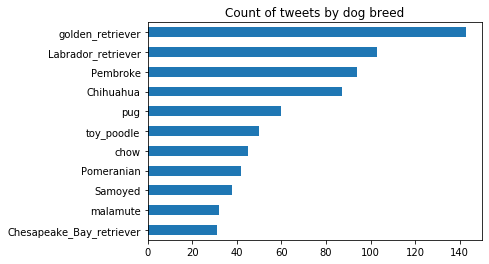

In [100]:
valid_dogs = df_merged[df_merged['dog_breed'] != 'Hard to tell']
valid_dogs['dog_breed'].value_counts()[10::-1].plot(kind='barh' , title= 'Count of tweets by dog breed' )                                                    

How a Australian slang has dominated social media. Puppers seem to excite majority of the people andd there are more tweets of puppers than  all the other dogs put together.

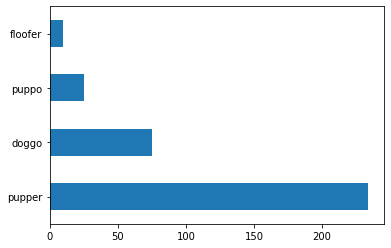

In [101]:
df_merged['dogs_stage'].value_counts()
df_merged['dogs_stage'].value_counts().plot(kind='barh')

The table shows the top 5 liked dog in WeRateDogs website. The competetion at teh top is high as the mean like count is pretty low at ~6000. These are clear winners from our dataset

In [102]:
df_merged.groupby(['url'])['favorite_count'].sum().sort_values(ascending = False).fillna(0)[:5]

url
https://twitter.com/dog_rates/status/744234799360020481    158108.0
https://twitter.com/dog_rates/status/822872901745569793    134767.0
https://twitter.com/dog_rates/status/807106840509214720    122081.0
https://twitter.com/dog_rates/status/866450705531457537    117641.0
https://twitter.com/dog_rates/status/739238157791694849    116787.0
Name: favorite_count, dtype: float64

The frequency of getting a dog with a high favourite count is very low. However the process is pretty popular with majority of dogs getting between 0 and 20k likes

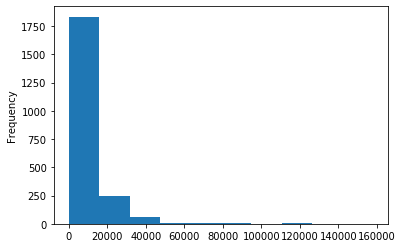

In [103]:
df_merged['favorite_count'].plot(kind='hist')

It is prett clear that a high percentage of dogs are rated over 10 although the rating system is between 1 and 10

In [104]:
twitter_enhanced_clean.dog_rating.describe()

count    2175.000000
mean     12.190625  
std      42.441791  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: dog_rating, dtype: float64

The prediction confidence of the image using the neural network is pretty high - but not perfect

In [105]:
df_merged.confidence_level.describe()

count    1928.000000
mean     0.546872   
std      0.299236   
min      0.000010   
25%      0.295845   
50%      0.538992   
75%      0.822125   
max      1.000000   
Name: confidence_level, dtype: float64

# The End